# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
1.The bar graph shows that the drug regimen, Capomulin was tested on the maximum number of mice (230), followed by Ramicane (228).
2.The pie graph shows that the male and female population was close, 49% for female and 51% for male.
3.The line graph shows that Capomulin seems to be an effective drug regimen to treat the cancer because the tumor size in mouse l509 decreased overtime.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)




In [2]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
# Combine the data into a single DataFrame
combined_data_df = pd.merge(mouse_metadata, study_results, on = "Mouse ID", how = "outer")

# Display the data table for preview
combined_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Checking the number of mice.
number_mice = combined_data_df['Mouse ID'].nunique()
number_mice

249

In [6]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice_id = combined_data_df.loc[combined_data_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
dup_mice_id

array(['g989'], dtype=object)

In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mice_id_df = combined_data_df.loc[combined_data_df["Mouse ID"] == "g989", :]
dup_mice_id_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_data_df[combined_data_df['Mouse ID'].isin(dup_mice_id)==False]
clean_df.head()   

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [9]:
# Checking the number of mice in the clean DataFrame.
number_mice_again = clean_df['Mouse ID'].nunique()
number_mice_again

248

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_volume = clean_df.groupby(['Drug Regimen'])
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = tumor_volume['Tumor Volume (mm3)'].mean()
median = tumor_volume['Tumor Volume (mm3)'].median()
variance = tumor_volume['Tumor Volume (mm3)'].var()
standard_deviation = tumor_volume['Tumor Volume (mm3)'].std()
sem = tumor_volume['Tumor Volume (mm3)'].sem()
# Assemble the resulting series into a single summary DataFrame.
tumer_summary_statistics_df = pd.DataFrame({'Mean Tumer Volume' : mean, 'Median Tumor Volume': median,
                                        'Tumor Volume Variance': variance,
                                        'Tumor Volume Std. Dev.':standard_deviation,
                                        'Tumor Volume Std. Err.': sem})
tumer_summary_statistics_df

,Mean Tumer Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
tumor_volume_2 = clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
tumor_volume_2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

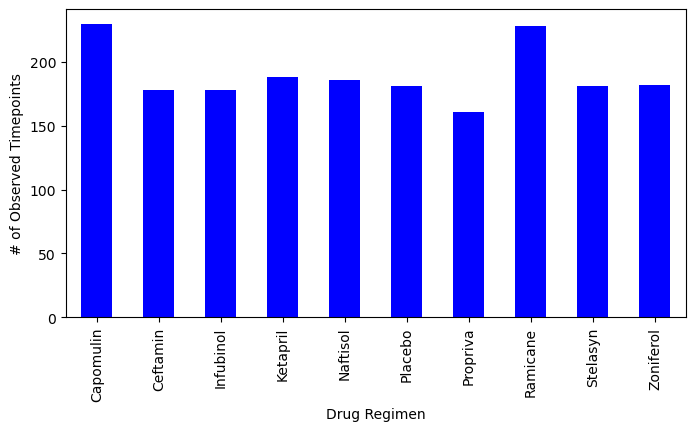

<Figure size 640x480 with 0 Axes>

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_observed_per_timepoint = combined_data_df.groupby(["Drug Regimen"]).count()["Timepoint"]
bar_plot_pandas = mice_observed_per_timepoint.plot(kind="bar", color='b', figsize=(8,4), fontsize = 10)

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Timepoints")

plt.show()
plt.tight_layout()

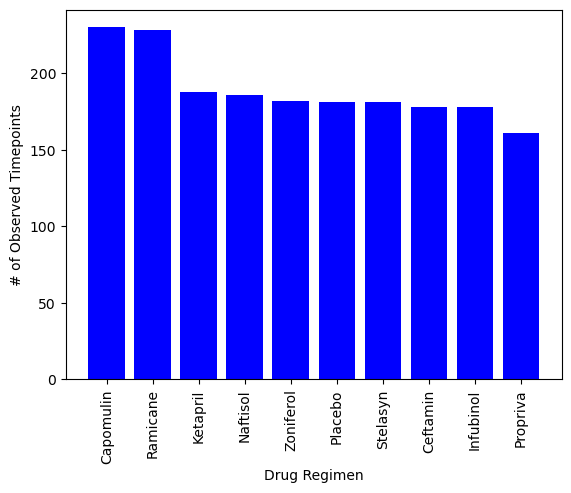

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
timepoint_descending = mice_observed_per_timepoint.sort_values(ascending=False) 
plt.bar(timepoint_descending.index, timepoint_descending.values, color="b", align="center") 
plt.xlabel('Drug Regimen') 
plt.ylabel('# of Observed Timepoints') 
plt.xticks(rotation='vertical') 
plt.show()

<Axes: ylabel='Sex'>

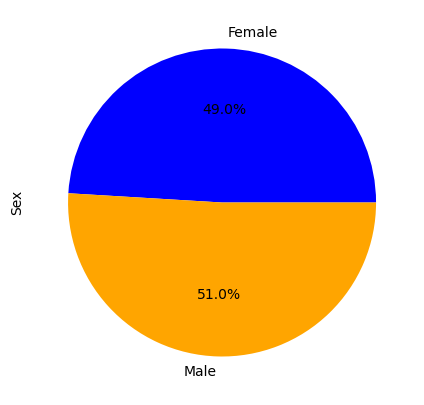

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex = clean_df.groupby(['Sex'])['Sex'].count()

plt.figure(figsize=(5, 5))
sex.plot(kind='pie',autopct='%1.1f%%', colors = ['blue','orange'])


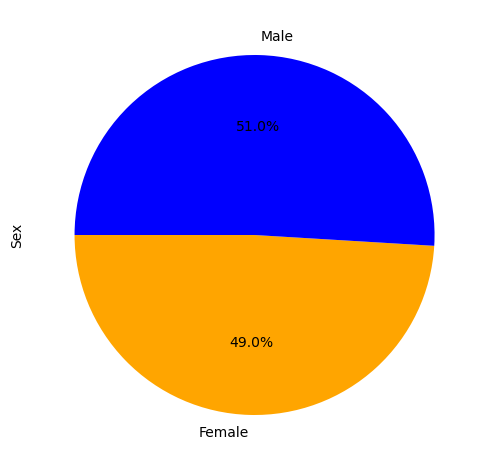

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex, labels=('Female', 'Male'), startangle=180, autopct='%1.1f%%', colors = ['orange','blue'])
plt.ylabel('Sex')
plt.tight_layout()
plt.show()

## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]
Ramicane_df = clean_df.loc[clean_df["Drug Regimen"] == "Ramicane", :]
Infubinol_df = clean_df.loc[clean_df["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = clean_df.loc[clean_df["Drug Regimen"] == "Ceftamin", :]
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_df.groupby('Mouse ID').max()['Timepoint']
last_timepoint_df = pd.DataFrame(last_timepoint)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_timepoint_tumor_volume_df = pd.merge(last_timepoint_df,clean_df,on = ["Mouse ID","Timepoint"], how = 'left')
last_timepoint_tumor_volume_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [17]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data =[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume = last_timepoint_tumor_volume_df.loc[last_timepoint_tumor_volume_df["Drug Regimen"]==drug,"Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol_data.append(tumor_volume)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_volume.quantile([.25, .5, .75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq 
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumor_volume.loc[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)]
    print(f"{drug}'s potential outliers are: {outliers}")

Capomulin's potential outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers are: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)


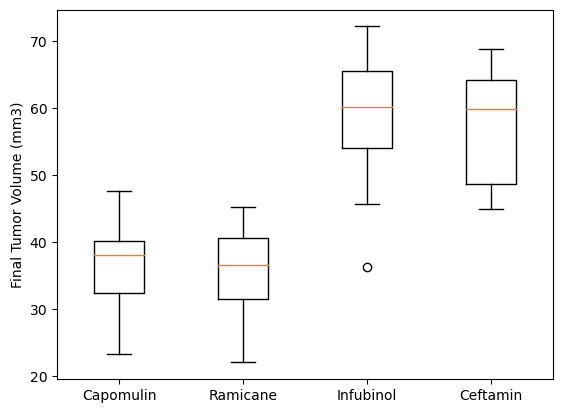

In [18]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()#
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(tumor_vol_data, labels=treatments, widths = 0.4)
plt.show()

## Line and Scatter Plots

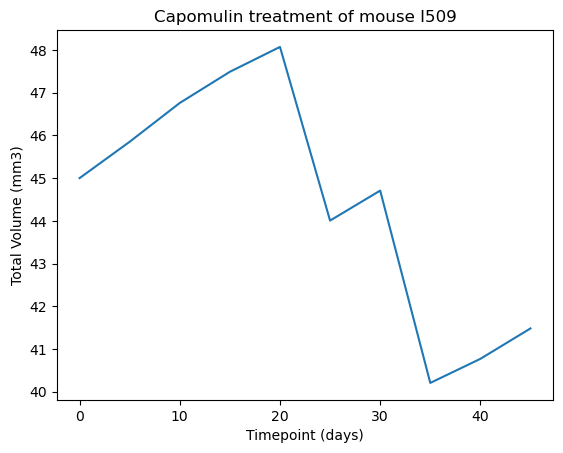

In [19]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
line_plot_df = clean_df.loc[clean_df["Mouse ID"] == "l509",:]
line_plot_df

x_axis = line_plot_df['Timepoint']
y_axis = line_plot_df['Tumor Volume (mm3)']

plt.plot(x_axis,y_axis)
plt.title("Capomulin treatment of mouse I509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Total Volume (mm3)")
plt.show()

In [30]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
catter_plot_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]

average_value = catter_plot_df.groupby(['Mouse ID']).mean()

plt.scatter(caverage_value['Weight (g)'],average_value['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()



TypeError: Could not convert CapomulinCapomulinCapomulinCapomulinCapomulinCapomulinCapomulinCapomulinCapomulinCapomulin to numeric

## Correlation and Regression

In [33]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = round(st.pearsonr(average_value['Weight (g)'],average_value['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and the average tumor volume is {correlation}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(average_value["Weight (g)"], average_value["Tumor Volume (mm3)"])
regress_values = average_value["Weight (g)"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# fig1, ax1 = plt.subplots(figsize=(12, 8))
plt.scatter(average_value["Weight (g)"], average_value["Tumor Volume (mm3)"], color="blue")
plt.plot(xaverage_value["Weight (g)"],regress_values,color="red")
plt.annotate(line_eq,(20,36), fontsize=14)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

NameError: name 'average_value' is not defined